## Practice Assignment 

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**



### About the data set (Detected Cases of Ebola)

This dataset consists of data for countries with an active Ebola outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of ebola reported from Guinea

**Cases_Liberia**: Number of cases of ebola reported from Liberia

**Cases_SierraLeone**: Number of cases of ebola reported from Sierra Leone

**Cases_Nigeria**: Number of cases of ebola reported from Nigeria

**Cases_Senegal**: Number of cases of ebola reported from Senegal

**Cases_UnitedStates**: Number of cases of ebola reported from the United States of America

**Cases_Spain**: Number of cases of ebola reported from Spain

**Cases_Mali**: Number of cases of ebola reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of ebola from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of ebola from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of ebola from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of ebola from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of ebola from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of ebola from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of ebola from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of ebola from Mali

**Import the required libraries**

In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np


# import seaborn 
import seaborn as sns



#### Load the ebola dataset and display the first five records 

In [2]:
# load the csv file
df_ebola = pd.read_csv('ebola.csv')

# display the first five observations
df_ebola.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection


<b>Q.1. Display the column names having no data ?</b>
               

In [3]:
df_ebola.isna().any()

Cases_Guinea           True
Cases_Liberia          True
Cases_SierraLeone      True
Cases_Nigeria          True
Cases_Senegal          True
Cases_UnitedStates     True
Cases_Spain            True
Cases_Mali             True
Deaths_Guinea          True
Deaths_Liberia         True
Deaths_SierraLeone     True
Deaths_Nigeria         True
Deaths_Senegal         True
Deaths_UnitedStates    True
Deaths_Spain           True
Deaths_Mali            True
dtype: bool

#### Reference question with solution  
#### Display index value of rows whose all columns have no data.

In [4]:
i = df_ebola.index[df_ebola.isna().all(axis=1)]
print (i)

Int64Index([4, 21, 39, 99], dtype='int64')


We can use the final obtained list of indices to eliminate the empty records from the data. 

<b>2. Find a list of all the columns which have more than 60% of their values missing.</b>
               

In [5]:
null_values = df_ebola.isnull().sum()
null_values

Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64

In [6]:
# set the threshold value to filter the columns
# shape[0] returns number of rows for a dataframe
threshold = 0.6*df_ebola.shape[0]
print(threshold)

# isnull() returns the boolean output as to whether the value is 'null' or not
# sum() returns the total number of missing values
null_values = df_ebola.isnull().sum()

# print the list of columns that exceed the threshold
col_list = list(null_values.index[null_values > threshold])
col_list

76.2


['Cases_Nigeria',
 'Cases_Senegal',
 'Cases_Spain',
 'Cases_Mali',
 'Deaths_Nigeria',
 'Deaths_Senegal',
 'Deaths_Spain',
 'Deaths_Mali']

Since the isnull().sum() returns a pandas series we use index function to obtain a list of column names.
All the columns that exceed the threshold should ideally be eliminated from the data unless the columns are mentioned to be of significant importance.

<a id="hmsv"> </a>
## 2. Handling Missing Values

 <b>3. Eliminate all the records where no more than two observations have been recorded.</b>
               

In [7]:
# check the shape of the dataframe
print("Shape of the data before elimination:", df_ebola.shape)

# use the dropna() to remove the rows 
df_ebola_updated = df_ebola.dropna(thresh = 3) 

# check the shape of the dataframe
print("Shape of the data after elimination:", df_ebola_updated.shape)

Shape of the data before elimination: (127, 16)
Shape of the data after elimination: (110, 16)


The threshold attribute is used to specify the number of least observations required to retain a record. 

Here 60% is assumed to be the threshold value  for eliminating a column.


<b>4. How would you treat the missing values of the reported cases from Liberia?</b>
               

In [8]:
# check the number of null values in the column 'Cases_Liberia'
print("Null values before treatment:", df_ebola['Cases_Liberia'].isnull().sum())


Null values before treatment: 44


<b> 5)Plot a histogram for 'Cases_Liberia' column?</b>

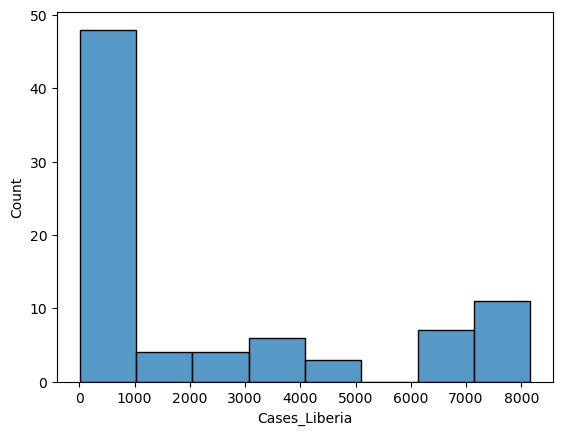

In [9]:
sns.histplot(data=df_ebola,x=df_ebola.Cases_Liberia);

<b>6)Imputing with median value for 'Cases_Liberia' column ?</b>

In [11]:
# imputing with median value 
df_ebola['Cases_Liberia'] = df_ebola['Cases_Liberia'].fillna(df_ebola['Cases_Liberia'].median())


<b>7) Check the null values after imputation?</b>

In [12]:
#d)# check the null values after imputation
print("Null values after treatment:", df_ebola['Cases_Liberia'].isnull().sum())

Null values after treatment: 0


Since initially, the values in the column 'Cases_Liberia' are imbalanced we can use the median value of the column to impute the missing observations.

<b>8. How would you treat the missing values from the reported cases of ebola from the United States of America?</b>
               

In [13]:
# 8.check number of null values in column

In [14]:
print("null values before treatment:", df_ebola['Cases_UnitedStates'].isnull().sum())


null values before treatment: 54


<b> 9.Plot a histogram for 'Cases_UnitedStates' column? </b>

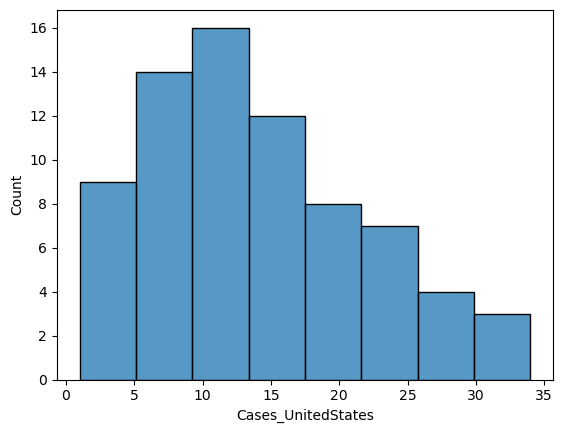

In [16]:
sns.histplot(data=df_ebola,x=df_ebola.Cases_UnitedStates);

<b> 10.Imputing with mean value for Cases_UnitedStates? </b>

In [18]:
df_ebola['Cases_UnitedStates'] = df_ebola['Cases_UnitedStates'].fillna(df_ebola['Cases_UnitedStates'].mean())


<b> 11. Display the result and check for null values for Cases_UnitedStates column? </b>

In [20]:
print("null values after treatment:",df_ebola['Cases_UnitedStates'].isnull().sum())

null values after treatment: 0


Since initially, the values in the column 'Cases_UnitedStates' are balanced we can use the mean value of the column to impute the missing observations.

If  the data is imbalanced we have used the median as a strategy for imputation.

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 6 to 9)

In [21]:
# load the csv file
df_house = pd.read_csv('house.csv')

# display the first five observations
df_house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<a id="out"> </a>
## 6. Outlier Detection Techniques 

<b> 12. Is there a feature in the dataset which could be exempted from outlier treatment?Hint:Plot a histogram on numerical variables ?</b>


In [ ]:
sns.histplot(data=df_house)

Or below code using Matplotlib 

In [ ]:
# plot histogram of all numeric variables
# set the number of bins to 20
# set the figure size using 'figsize'
df_house.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

Since the values of 'Landsize' are concentrated around limited range of values we may overlook the variable when considering outlier treatment.

<b>13. How do we check the outlier values for the feature representing the number of car spots?</b>
               

In [ ]:
sns.boxplot(x=df_house['Car']);

Or below code using Matplotlib 

In [ ]:
# set the figure size
plt.figure(figsize = (15,8))

# plot the boxplot for 'Car' to visualize the outliers
plt.boxplot(x = df_house['Car'])

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Boxplot for Count of Car Spots', fontsize = 15)
plt.ylabel('Number of Car Spots', fontsize = 15)

# display the plot
plt.show()

Majority of the observations from records have count of car spots concentrated from 0 to 3. All the values outside the range will be considered as outliers.

<b>14. Compare the outliers present in the price of real estates by their type ?
</b>
               

In [ ]:
sns.boxplot(x = df_house['Type'], y = df_house['Price'] , palette='pastel');


From the above plot, we can observe that cottages, villas have a huge range of price values because this type of real estate is usually subject to more customization and hence affects the price and has more outliers. 

<b>15. Suggest a method to find the outlier values for the feature representing the number of bathrooms? Hint: Draw a distplot 
 </b>
               

In [ ]:

sns.distplot( a=df_house['Bathroom']);


Or below code using Matplotlib 

In [ ]:
# set the figure size
plt.figure(figsize = (15,8))

# histogram of 'Bathroom' to visualize the outliers 
plt.hist(x = df_house['Bathroom'])

# assign plot and axes labels
# set text size using 'fontsize'
plt.title('Histogram of Count of Bathrooms', fontsize = 15)
plt.xlabel('No. of Bathrooms', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

From the plot we can see that the feature 'Bathroom' is skewed. 

<b>16. Draw a boxplot for the  feature representing the number of bedrooms?
                    </b>
               

In [ ]:
sns.boxplot(x=df_house['Bedroom']);

The plot shows the presence of an extreme outlier. 

*****************************THE END********************************